In [1]:
import tensorflow as tf
print(tf.__version__)

/Library/Python/3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


2.15.0


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from six.moves import urllib

import tensorflow as tf 
import tensorflow.feature_column as fc  

In [4]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') 
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') 

print(dftrain.head()) 

y_train  = dftrain.pop('survived') 
Y_eval = dfeval.pop('survived') 

dftrain.head()

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [5]:
dftrain.describe() 

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [7]:
print(dftrain.head())



      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


In [8]:
print(dftrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB
None


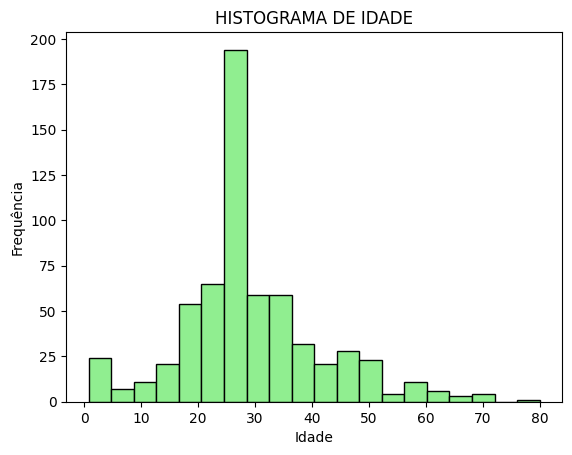

In [12]:
plt.hist(dftrain['age'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('HISTOGRAMA DE IDADE')
plt.show()

In [32]:
media_idade = dftrain['age'].mean()
print("Média de idade dos passageiros:", media_idade)

Média de idade dos passageiros: 29.631307814992027


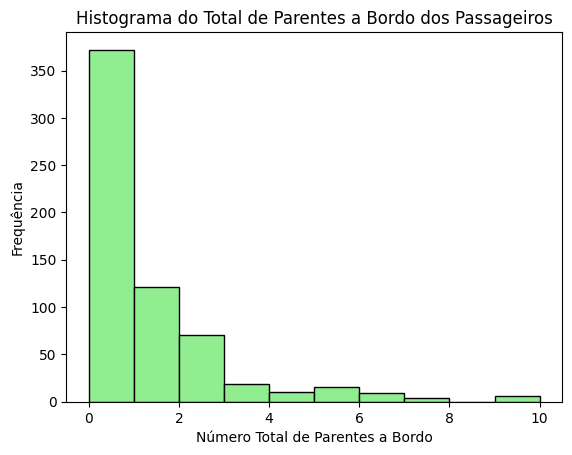

In [25]:
dftrain['Total_Parentes'] = dftrain['n_siblings_spouses'] + dftrain['parch']

plt.hist(dftrain['Total_Parentes'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Número Total de Parentes a Bordo')
plt.ylabel('Frequência')
plt.title('Histograma do Total de Parentes a Bordo dos Passageiros')
plt.show()



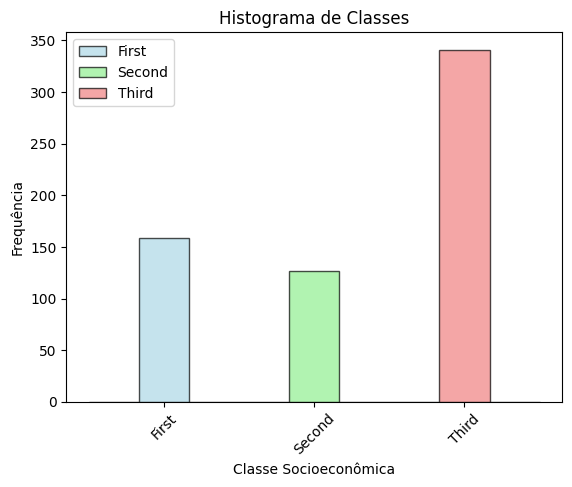

In [30]:
colors = {'First': 'lightblue', 'Second': 'lightgreen', 'Third': 'lightcoral'}

for classe, cor in colors.items():
    dados_classe = dftrain[dftrain['class'] == classe]
    plt.hist(dados_classe['class'], bins=3, color=cor, edgecolor='black', label=classe, alpha=0.7)

plt.xlabel('Classe Socioeconômica')
plt.ylabel('Frequência')
plt.title('Histograma de Classes')
plt.xticks(rotation=45)
plt.legend()
plt.show()

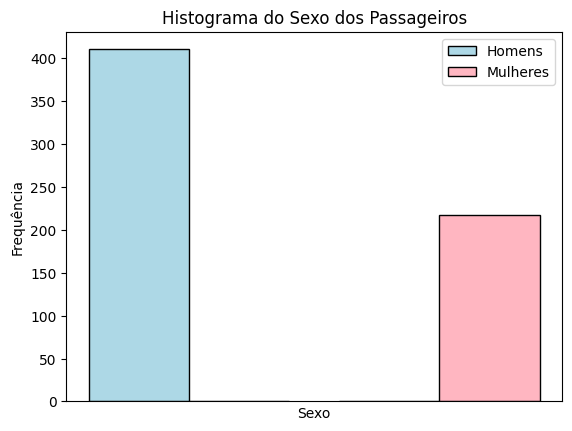

In [28]:
homens = dftrain[dftrain['sex'] == 'male']
mulheres = dftrain[dftrain['sex'] == 'female']

plt.hist([homens['sex'], mulheres['sex']], bins=2, color=['lightblue', 'lightpink'], edgecolor='black', label=['Homens', 'Mulheres'])
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.title('Histograma do Sexo dos Passageiros')
plt.xticks(rotation=45)
plt.legend()
plt.show()